# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Finding Donors for *CharityML*

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Please specify WHICH VERSION OF PYTHON you are using when submitting this notebook. Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [49]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=5))


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

** HINT: ** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [25]:
# TODO: Total number of records
n_records = data.shape[0]

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = data[data.income == ">50K"].shape[0]

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k =data[data.income == "<=50K"].shape[0]

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = n_greater_50k *100 /n_records

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78439697492371%


** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

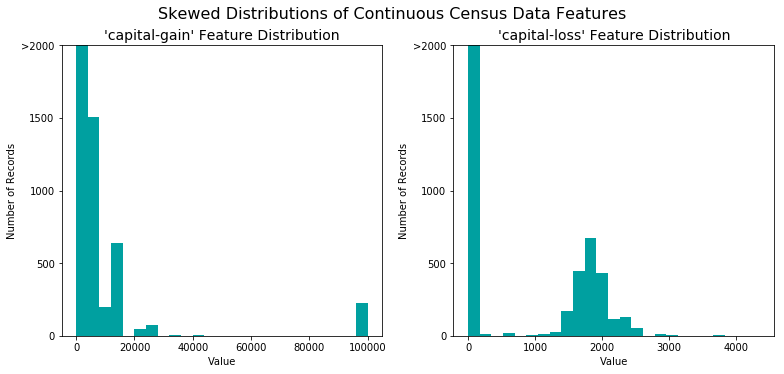

In [26]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)
# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,7.684784,0.000000,40.0,United-States
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.000000,13.0,United-States
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.000000,40.0,United-States
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.000000,40.0,United-States
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.000000,40.0,Cuba
5,37,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.000000,0.000000,40.0,United-States
6,49,Private,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.000000,0.000000,16.0,Jamaica
7,52,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.000000,45.0,United-States
8,31,Private,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,9.552866,0.000000,50.0,United-States
9,42,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,8.552367,0.000000,40.0,United-States


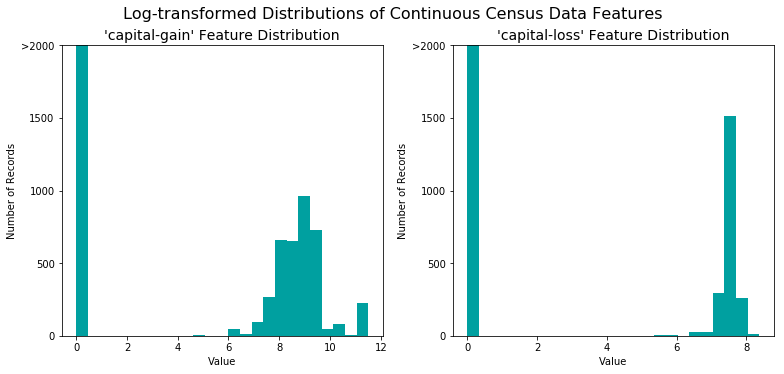

In [27]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))
display(features_log_transformed)
# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [28]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_log_minmax_transform'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [29]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()

features_final = pd.get_dummies(features_log_minmax_transform)
display(features_final.head(n=10))

# TODO: Encode the 'income_raw' data to numerical values
income = income_raw.replace(["<=50K",">50K"],[0,1])
display(income.head(n=10))

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print(encoded)

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.800000,0.667492,0.0,0.397959,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.800000,0.000000,0.0,0.122449,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.533333,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.400000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.800000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.273973,0.866667,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0.438356,0.266667,0.000000,0.0,0.153061,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.479452,0.533333,0.000000,0.0,0.448980,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
8,0.191781,0.866667,0.829751,0.0,0.500000,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
9,0.342466,0.800000,0.742849,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    1
9    1
Name: income, dtype: int64

103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ A

### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [30]:
# Import train_test_split
#from sklearn.cross_validation import train_test_split

from sklearn.model_selection import train_test_split
# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

# Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 


#### Note: Recap of accuracy, precision, recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

### Question 1 - Naive Predictor Performace
* If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

** Please note ** that the the purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally your base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than random choice is a place you could start from.

** HINT: ** 

* When we have a model that always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total. 
* Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

In [31]:
# Counting the ones as this is the naive case.
TP = np.sum(income)
FP = income.count()-TP
print(TP)
print(FP)
TN = 0
FN = 0 

# TODO: Calculate accuracy, precision and recall
accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
fscore = (1+ 0.5**2)* (precision * recall/((0.5**2)*precision + recall))

# Print the results 
print(f"Naive Predictor: [Accuracy score: {accuracy:.4f}, F-score: {fscore:.4f}]")

11208
34014
Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

- Describe one real-world application in industry where the model can be applied. 
- What are the strengths of the model; when does it perform well?
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

** HINT: **

Structure your answer in the same format as above^, with 4 parts for each of the three models you pick. Please include references with your answer.

### Answer: 
Three models which i have chosen for this is
1. Decision Tree
2. K Nearest Neighbors
3. SVM 

### Real world applications
*  Decision Tree - Weather Prediction based on certain atmospheric factors like humidity,wind speed,temperature etc
*  K Nearest Neighbors - Prediciting value of a house in a neighborhood based on value of the houses with similar parameters nearest to it . We can choose how many nearest neighbors we want to consider to determine the price of the house. 
*  SVM (Support Vector Machines) - Image Classifcation - It is used extensively in face recognition. 

### Strengths and Weakness of the models

## 1. Decision Tree 

Strength
* Very simple to understand and results can be easily interpreted
* Does not require more computation
* It is suitable for both regression (continuous) and non-regression (Discrete/categorical) types
* Can work on both numeric an non numeric data. 
* Requires very little data prepartion.

Weakness
* Trees can grow over a period of time and needs to be pruned regularly.
* If the outcomes are linked to each other, then the decision can be very   complex
* A small change in the dataset can lead to large change in the structure of the decision tree. 
        
Reasons for choosing : 

1) A cursory look at the features of the dataset shows that it is possible to get the final output based on 5 or 6 important features like age, hours per week, capital loss etc without compromising on accuracy or f-score. I would like to validate this finding.    
2) Decision trees generally tend to overfit the data and it should get reflected in the accuracy scores. i would like to validate this .

3) Decison trees are easy to visualise and once the results are returned, i could validate the findings. 
        
Source : https://en.wikipedia.org/wiki/Decision_tree
Source : http://scikit-learn.org/stable/modules/tree.html
     
## 2. K Nearest Neighbors
Strengths
* Very simple algorithm
* It is non-parametric and hence normalised distribution is not mandatory for it to work.
* It can be used for both Regression and non-regression .
       
Weakness
* If the data is skewed and there are lot of outliners, the prediction can go wrong. One way of mitigating it is to   assign weights based on the relative distance from the point (data) being measured. 
* The accuracy of the algorithm is severely degraded by the presence of noisy or irrelevant features.

http://scikit-learn.org/stable/modules/neighbors.html
https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm
   

Reasons for choosing: 

* It is a very simple algorithm and results are easy to interpret. 

* Number of features (inputs) have  risen after doing hot encoding. Would like to see how the algorithm performs with these amount of features. 

* The principle behind nearest neighbor methods is to find a predefined number of training samples closest in distance to the new point, and predict the label from these. This would work in this case since finding donors with similar characteristics will help in figuring out whether someone will donate or not. 

* The dataset is already cleansed and does not contain any noise. 


## 3. SVM 
Strengths 
* It can do complex transformation (Kernel trick) and does not degrade with large number of features.
* They are resistant to overfitting
* Effective in high dimensional spaces.
       
Weakness
* Results are difficult to interpret since complex transformation is involved.
* Does not work very well with large datasets. 
* If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.

Reasons for Choosing
* Data set is small and features are high.
* A general characteristic of SVC is that it does not overfit . I would like to verify this in this dataset.
* Number of features is less than the number of samples and hence overfitting is not an issue for this dataset. 
       
source: http://www.simafore.com/blog/bid/112816/When-do-support-vector-machines-trump-other-classification-methods

## Point to note.
Some of the features of the algorithms like capability of working on both normalised and non-normalised dataset, categorical and non categorical data, regression  are not more relevant here since we have normalised the data , made the output discrete, converted non-categorical data in to categorical data.


### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [35]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
import datetime

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    
    start = time() # Get start time
    startTime = datetime.datetime.now()
    print("********************")
    print(f"{learner.__class__.__name__}") 
    print("********************\n")
    print("----------------------------------------------------------------------------------------------------------------")
    print(" ")
    print(f"{learner.__class__.__name__} : Training Start Time is {startTime}")
    learner = learner.fit(X_train[:sample_size],y_train[:sample_size])
    endTime = datetime.datetime.now()
    print(f"{learner.__class__.__name__} : Training End Time is {endTime}")
    print(f"Total time taken to learn on  training data for sample size: {sample_size} is : {endTime-startTime} Seconds")
    print(" ")
    print("----------------------------------------------------------------------------------------------------------------")
    end = time() # Get end time
  
    # TODO: Calculate the training time
    results['train_time'] = end-start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    startTime = datetime.datetime.now()
    print("----------------------------------------------------------------------------------------------------------------")
    print(" ")
    print(f"{learner.__class__.__name__} : Prediction Start Time on test dataset is {startTime}")
    predictions_test = learner.predict(X_test)
    endTime = datetime.datetime.now()
    print(f"{learner.__class__.__name__} : Prediction End Time on test dataset is {endTime}")
    print(f"Total time taken for prediction on testing data  is : {endTime-startTime} Seconds")
    print(" ")
    print("----------------------------------------------------------------------------------------------------------------")
    
    startTime = datetime.datetime.now()
    print(f"{learner.__class__.__name__} : Prediction Start Time on training dataset is {startTime}")
    predictions_train = learner.predict(X_train[0:300])
    end = time() # Get end time
    endTime = datetime.datetime.now()
    print(f"{learner.__class__.__name__} : Prediction End Time on training dataset is is {endTime}")
    print(f"Total time taken to predict on training data for sample size: {sample_size} is : {endTime-startTime} Seconds")
    print("----------------------------------------------------------------------------------------------------------------")
    print(" ")
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end-start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[0:300],predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[0:300],predictions_train,0.5) ## our beta classifier is 0.5
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] =  fbeta_score(y_test,predictions_test,0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
    print("----------------------------------------------------------------------------------------------------------------")
    print(" ")
    print(" ")
    print(" ")
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

********************
SVC
********************

----------------------------------------------------------------------------------------------------------------
 
SVC : Training Start Time is 2018-04-23 04:57:04.809049
SVC : Training End Time is 2018-04-23 04:57:04.855920
Total time taken to learn on  training data for sample size: 361 is : 0:00:00.046871 Seconds
 
----------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------
 
SVC : Prediction Start Time on test dataset is 2018-04-23 04:57:04.855920
SVC : Prediction End Time on test dataset is 2018-04-23 04:57:05.207388
Total time taken for prediction on testing data  is : 0:00:00.351468 Seconds
 
----------------------------------------------------------------------------------------------------------------
SVC : Prediction Start Time on training dataset is 2018-04-23 04:57

F:\venghatesh\pythonsetup\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


SVC : Training End Time is 2018-04-23 04:57:06.769862
Total time taken to learn on  training data for sample size: 3617 is : 0:00:01.538278 Seconds
 
----------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------
 
SVC : Prediction Start Time on test dataset is 2018-04-23 04:57:06.769862
SVC : Prediction End Time on test dataset is 2018-04-23 04:57:09.432508
Total time taken for prediction on testing data  is : 0:00:02.662646 Seconds
 
----------------------------------------------------------------------------------------------------------------
SVC : Prediction Start Time on training dataset is 2018-04-23 04:57:09.432508
SVC : Prediction End Time on training dataset is is 2018-04-23 04:57:09.526262
Total time taken to predict on training data for sample size: 3617 is : 0:00:00.093754 Seconds
--------------------------------

KNeighborsClassifier : Prediction End Time on test dataset is 2018-04-23 05:00:18.400770
Total time taken for prediction on testing data  is : 0:00:00.954161 Seconds
 
----------------------------------------------------------------------------------------------------------------
KNeighborsClassifier : Prediction Start Time on training dataset is 2018-04-23 05:00:18.400770
KNeighborsClassifier : Prediction End Time on training dataset is is 2018-04-23 05:00:18.432020
Total time taken to predict on training data for sample size: 361 is : 0:00:00.031250 Seconds
----------------------------------------------------------------------------------------------------------------
 
KNeighborsClassifier trained on 361 samples.
----------------------------------------------------------------------------------------------------------------
 
 
 
********************
KNeighborsClassifier
********************

-------------------------------------------------------------------------------------------

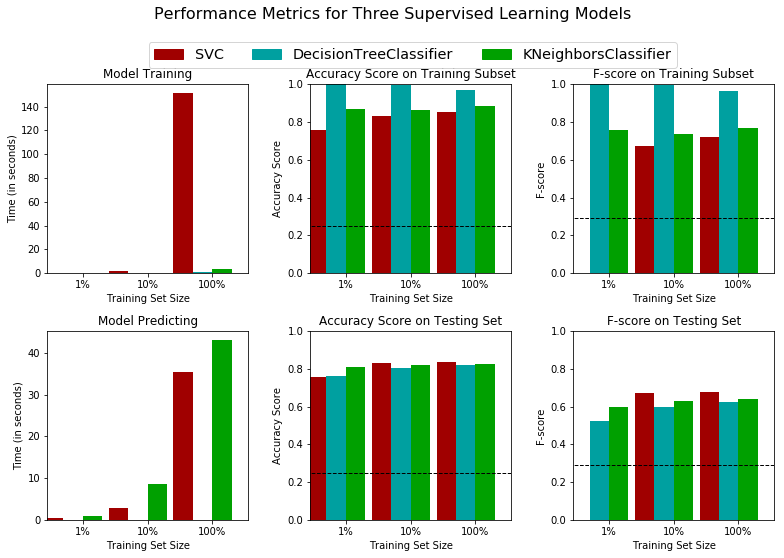

SVC


,1%,10%,100%
acc_test,0.756219,0.832615,0.837148
acc_train,0.760000,0.833333,0.853333
f_test,0.000000,0.671256,0.674477
f_train,0.000000,0.671296,0.719697
pred_time,0.360039,2.756399,35.498105
train_time,0.046871,1.538278,151.171803


DecisionTreeClassifier


,1%,10%,100%
acc_test,0.763184,0.804201,0.817800
acc_train,1.000000,0.996667,0.970000
f_test,0.522881,0.599135,0.626326
f_train,1.000000,0.997191,0.963855
pred_time,0.015622,0.015624,0.036003
train_time,0.015628,0.062499,1.013803


KNeighborsClassifier


,1%,10%,100%
acc_test,0.807407,0.819569,0.823549
acc_train,0.870000,0.863333,0.883333
f_test,0.600045,0.630839,0.639164
f_train,0.757042,0.736301,0.771605
pred_time,0.985410,8.550876,43.158398
train_time,0.015623,0.046874,3.187907


In [36]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# TODO: Initialize the three models
clf_A = SVC(random_state=108)
clf_B = DecisionTreeClassifier(random_state=108)
clf_C = KNeighborsClassifier()

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = int(len(y_train)/10)
samples_1 = int(len(y_train)/100)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
print("*****")
vs.evaluate(results, accuracy, fscore)

## Printing tabular form of results. 
for rec in results.items():
    print(rec[0])
    display(pd.DataFrame(rec[1]).rename(columns={0:'1%', 1:'10%', 2:'100%'}))

----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model

* Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000. 

** HINT: ** 
Look at the graph at the bottom left from the cell above(the visualization created by `vs.evaluate(results, accuracy, fscore)`) and check the F score for the testing set when 100% of the training set is used. Which model has the highest score? Your answer should include discussion of the:
* metrics - F score on the testing when 100% of the training data is used, 
* prediction/training time
* the algorithm's suitability for the data.

### Evaluation of Models and Choosing the Best Model :

 * Lets first look the confusion matrix and decide on the model 
 * What is Confusion Matrix ?
 
    Confusion Matrix are used to evaluate the quality of the output of a classifier on the given data set. The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

#### Link to Confusion Matrix and code used as reference :  http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py



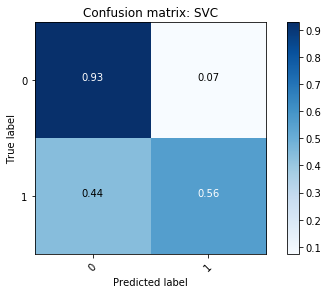

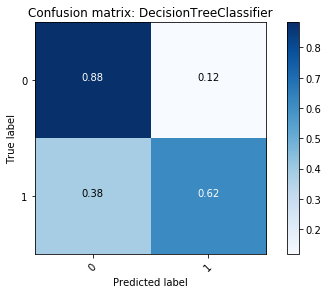

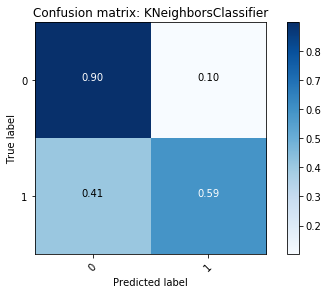

In [37]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    # This basically calculates the percentage of correct vs wrong.
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
# We have three models, so lets put in a loop and iterate them
class_names =[0,1]
for i,model in enumerate([clf_A, clf_B, clf_C]) :
    cnf_matrix = confusion_matrix(y_test, model.predict(X_test))
    np.set_printoptions(precision=2)
    # Plot normalized confusion matrix
    plt.figure(i)
    model_name=model.__class__.__name__
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title='Confusion matrix' + ": "+ model_name)

    plt.show()
    

## Inference from Confusion matrix

All the models seems to have be more or less performing same on the accuracy front, with SVC little bit better. We could not arrive at any good conclusions by looking at the confusion matrix. 

## Inference from Performance metrics. 
1. SVC is taking more time as the training dataset samples are increased when compared to other models , Decision tree takes the least time
2. On Training Dataset, the Decision tree takes the least time. 
3. Accuracy score and F-Score on training set is better for Decision tree compared to the other models
4. Accuracy score on testing set is more or less same for all the models. SVC seems to be performing little bit better on F-Score but i believe with some fine tuning Decision tree F-Scores on testing dataset could be improved. 
5. All models show good scores on training set compared to the testing data set . This shows that the model is not able to generalise based on the training data set provided. Further tuning of the dataset needs to be done to improve the models. 
6. One general thing we are seeing in all the models is that increase in training set, is not giving much increase in prediction scores. This shows that the model is not learning anything new as more data is provided.
7. Also when the sample size is very less (1%), SVC is not able to get F1 Score. This is because total positives and negative positives are zero. Sk learn sets them to zero since the result is undefined(precision = True positives/(True positives+ false Positives)) source : https://datascience.stackexchange.com/questions/12687/what-is-the-definition-of-precision-for-no-positive-classifications 

Based on 1,2,3,4 i would choose Decison tree for further fine tuning. 



### Question 4 - Describing the Model in Layman's Terms

* In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical jargon, such as describing equations.


1) Decision tree splits the data recursively in two parts based on certain conditions (eg: it will form two subsets of data age >=35 and another with age <=35) till a final decision is arrived at. 

2) To split the data, it will look at which feature is important and can split the data really well. Choosing relevant features to split the tree is very important. Features which are essential for decision making show be used as decision makers, otherwise the decision will take more time. In real life when we need to make decisions, we will have lot of factors to take in to consideration. But we always first use factors which are relevant to us and also filter the decisions based on descending ranks of those factors. Its the same with the decision tree. 

3) For machines to decide which features are important in decision making, it needs to be trained. This is done by training them on training data set. This is similar to experience we gain in life . During training, the machine learns which factors are important in decision making and progressively correct itself based on new training data it receives. Its similar to what we do in real life, where our decisions are based on our previous experiences.

4) To check whether the decisions are correct, it needs to be tested . This is done by using the testing dataset. The accuracy of these decisions are made by looking at the accuracy score and F-Scores. Higher the score on testing, better the model. 

5) In find donors , the model is trained on training dataset and during training it looks at the various features like age, number of years of experience etc to understand the importance of the factors. Filtering is done based on descending order of imporatance learnt by the model. Once we trained the model, we can then test the efficiency by giving a testing dataset which it has not seen before. 

References: 
https://en.wikipedia.org/wiki/Decision_tree_learning






### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

### Parameters to tune
(a) max_depth 

(B) min_samples_leaf [ This is default set to 1 and it tends to overfit. Hence need to fine tune this parameter]


http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

from sklearn.metrics import roc_curve, auc
from matplotlib.legend_handler import HandlerLine2D
#'min_samples_split':[2,3,4,5]
#'max_depth':[1,5,10,15],
# TODO: Initialize the classifier
startTime = datetime.datetime.now()
print(f"Start Time is {startTime}")
clf = DecisionTreeClassifier(random_state=108)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}

parameters1 =  {"max_depth":[10,15,20],"min_samples_leaf":[2,3,4,5,6,7,8,9,10]}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score,beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf,parameters1,scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train,y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
# Make predictions based on optimised model 
best_predictions = best_clf.predict(X_test)


# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
## classifier used on unoptimised model
print("Classifier on non-optimised model")
print(clf)
print("\n")
## classifier used on optimised model 
print("Classifier on optimised model")
print(best_clf)
endTime = datetime.datetime.now()

print(f"End Time is {endTime}")

Start Time is 2018-04-23 05:33:17.003885
Unoptimized model
------
Accuracy score on testing data: 0.8178
F-score on testing data: 0.6263

Optimized Model
------
Final accuracy score on the testing data: 0.8548
Final F-score on the testing data: 0.7189
Classifier on non-optimised model
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=108,
            splitter='best')


Classifier on optimised model
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=7, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=108,
            spl

### Question 5 - Final Model Evaluation

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  



#### Results:

|     Metric     | Naive Predictor BenchMark | Unoptimized Model | Optimized Model |
| :------------: | :------------------------ | :---------------: | :-------------: | 
| Accuracy Score |     0.2478                |     0.8178        |    0.8548       
| F-score        |     0.2917                |     0.6263        |    0.7189       


## Final model evaluation
After tuning max_depths and min_samples_leaf the F-Score and Accuracy score has increased suggesting that fine tuning has worked. Especially there is a marked increase in the F-Score, suggesting a better model. 

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?

### Important features relevant for prediction
    
* Hours per week 
    
     Hours per week is most important factor. More the number of hours , more will be the salary in general. More the salary, 
     the disposable income for charity will be high. 
    
* Capital Gain (Capital gain i persume here is the standard term used for  gain from Land, Shares, Mutual funds etc).

    A good capital gain will result in more cash for disposal and people will be willing to donate money to charity.
    
    
* Capital Loss (Capital loss i persume here is the standard term used for  loss from Land, Shares, Mutual funds etc)
    
    A increase in capital loss will result in less liquidity of money with the donor and he may not be willing to donate. 
    
    
* Education
    
    More the education, people will find it easy to get job and salary levels will be higher. They will be willing to donate to
    charity due to extra money they will have in hand. 
    

* Age
    
    More the age, i persume that salary levels will more and hence more money to donate to charity. At the same time, as age 
    increases , responsibility will be more (like educating kids, paying house loans, more medical expenses) so i am keeing my
    fingers crossed to understand the impact of age on people giving money to charity since it presents a paradoxial context. 

The above factors are arranged in order of importance.

### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

Start Time is 2018-04-23 05:35:48.954369


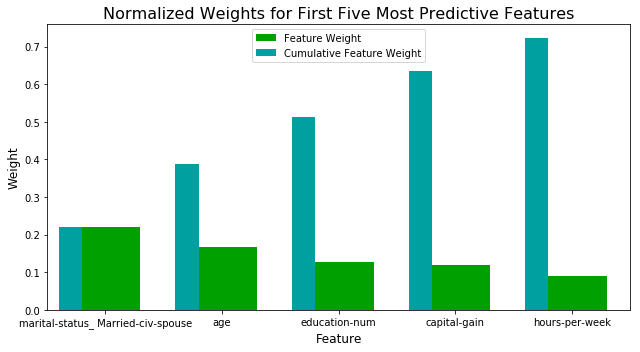

End Time is 2018-04-23 05:35:49.909822


In [41]:
# TODO: Import a supervised learning model that has 'feature_importances_'
startTime = datetime.datetime.now()
print(f"Start Time is {startTime}")

# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = DecisionTreeClassifier(random_state=108)
fit_model =model.fit(X_train,y_train)
# TODO: Extract the feature importances using .feature_importances_ 

importances = fit_model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)
endTime = datetime.datetime.now()
print(f"End Time is {endTime}")

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
* How do these five features compare to the five features you discussed in **Question 6**?
* If you were close to the same answer, how does this visualization confirm your thoughts? 
* If you were not close, why do you think these features are more relevant?

## Analysis 

* Out of the 5 features short listed, 4 features i considered are part of the five features considered by the model .

* Martial status - Married Civ Spouse is considered as a parameter by the model which i have missed out. I understand by googling that Married Civ Spouse refers to people whose spouse are civilians. Looking at the data (through excel), people with this category dominate >50K . This might be the reason that maritalstatus-married civ spouse is considered as a filter.

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [50]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8548
F-score on testing data: 0.7189

Final Model trained on reduced data
------
Accuracy on testing data: 0.8444
F-score on testing data: 0.6916


### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

## Analysis
a) F-Model and accuracy score are more or less same even when the features are reduced. 

b) The accuracy  on  reducted data set is 1.2% less compared to full data set. The F-Score is 3.7% less compared to the full dat set. 

c) Whether to consider reduced data set if training time was a factor, depends on the accuracy/F-Score that is required in specific domains. Eg : If it involves medical field or space , accuracy is very important and even a slight dip will have severe negative impact. In those fields, sacrificing training time is not a good idea. for less critical tasks, like whether a email has to be marked as spam or not, we can reduce the dataset if training time was a factor.  

d) In our case , data set size is less and also time taken to train and test is also less. Considering this factors, i would prefer to train on all features. 


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.